In [2]:
import numpy as np
from scipy import stats
from scipy import io as spio
from scipy import misc
from scipy import special
from scipy import integrate
from scipy import linalg
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg

import pandas as pd

%matplotlib inline

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.312796,-0.103624,0.686625,0.311170
2013-01-02,1.074443,-1.699394,0.761092,0.760066
2013-01-03,0.658641,-1.697906,0.387178,-0.353592
2013-01-04,0.428887,1.159724,0.204567,-0.392961
2013-01-05,-0.922811,-0.011961,1.218530,-0.185279
2013-01-06,-1.415975,-0.326974,-0.682269,0.110214


In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [8]:
df.head()

,A,B,C,D
2013-01-01,-0.312796,-0.103624,0.686625,0.311170
2013-01-02,1.074443,-1.699394,0.761092,0.760066
2013-01-03,0.658641,-1.697906,0.387178,-0.353592
2013-01-04,0.428887,1.159724,0.204567,-0.392961
2013-01-05,-0.922811,-0.011961,1.218530,-0.185279


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,0.428887,1.159724,0.204567,-0.392961
2013-01-05,-0.922811,-0.011961,1.218530,-0.185279
2013-01-06,-1.415975,-0.326974,-0.682269,0.110214


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [12]:
df.values

array([[-0.31279641, -0.10362418,  0.68662544,  0.31116971],
       [ 1.07444317, -1.69939397,  0.76109231,  0.76006588],
       [ 0.65864054, -1.69790588,  0.38717779, -0.35359245],
       [ 0.4288869 ,  1.15972429,  0.2045668 , -0.39296115],
       [-0.92281143, -0.01196095,  1.21853018, -0.18527862],
       [-1.41597463, -0.3269744 , -0.68226883,  0.11021369]])

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.081602,-0.446689,0.429287,0.041603
std,0.968156,1.098762,0.646073,0.444986
min,-1.415975,-1.699394,-0.682269,-0.392961
25%,-0.770308,-1.355173,0.250220,-0.311514
50%,0.058045,-0.215299,0.536902,-0.037532
75%,0.601202,-0.034877,0.742476,0.260931
max,1.074443,1.159724,1.218530,0.760066


In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.312796,1.074443,0.658641,0.428887,-0.922811,-1.415975
B,-0.103624,-1.699394,-1.697906,1.159724,-0.011961,-0.326974
C,0.686625,0.761092,0.387178,0.204567,1.218530,-0.682269
D,0.311170,0.760066,-0.353592,-0.392961,-0.185279,0.110214


In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.311170,0.686625,-0.103624,-0.312796
2013-01-02,0.760066,0.761092,-1.699394,1.074443
2013-01-03,-0.353592,0.387178,-1.697906,0.658641
2013-01-04,-0.392961,0.204567,1.159724,0.428887
2013-01-05,-0.185279,1.218530,-0.011961,-0.922811
2013-01-06,0.110214,-0.682269,-0.326974,-1.415975


In [16]:
df['A']

2013-01-01   -0.312796
2013-01-02    1.074443
2013-01-03    0.658641
2013-01-04    0.428887
2013-01-05   -0.922811
2013-01-06   -1.415975
Freq: D, Name: A, dtype: float64

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,-0.312796,-0.103624,0.686625,0.311170
2013-01-02,1.074443,-1.699394,0.761092,0.760066
2013-01-03,0.658641,-1.697906,0.387178,-0.353592


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.074443,-1.699394,0.761092,0.760066
2013-01-03,0.658641,-1.697906,0.387178,-0.353592
2013-01-04,0.428887,1.159724,0.204567,-0.392961


In [19]:
df.loc[dates[0]]

A   -0.312796
B   -0.103624
C    0.686625
D    0.311170
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.312796,-0.103624
2013-01-02,1.074443,-1.699394
2013-01-03,0.658641,-1.697906
2013-01-04,0.428887,1.159724
2013-01-05,-0.922811,-0.011961
2013-01-06,-1.415975,-0.326974


In [21]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.074443,-1.699394
2013-01-03,0.658641,-1.697906
2013-01-04,0.428887,1.159724


In [22]:
df.loc['20130102',['A','B']]

A    1.074443
B   -1.699394
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
df.loc[dates[0],'A']

-0.31279640893388588

In [24]:
df.at[dates[0],'A']

-0.31279640893388588

In [25]:
df.iloc[3]

A    0.428887
B    1.159724
C    0.204567
D   -0.392961
Name: 2013-01-04 00:00:00, dtype: float64

In [26]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.428887,1.159724
2013-01-05,-0.922811,-0.011961


In [27]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.074443,0.761092
2013-01-03,0.658641,0.387178
2013-01-05,-0.922811,1.218530


In [28]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.074443,-1.699394,0.761092,0.760066
2013-01-03,0.658641,-1.697906,0.387178,-0.353592


In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.103624,0.686625
2013-01-02,-1.699394,0.761092
2013-01-03,-1.697906,0.387178
2013-01-04,1.159724,0.204567
2013-01-05,-0.011961,1.218530
2013-01-06,-0.326974,-0.682269


In [30]:
df.iloc[1,1]

-1.6993939698983711

In [31]:
df.iat[1,1]

-1.6993939698983711

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.074443,-1.699394,0.761092,0.760066
2013-01-03,0.658641,-1.697906,0.387178,-0.353592
2013-01-04,0.428887,1.159724,0.204567,-0.392961


In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.686625,0.311170
2013-01-02,1.074443,NaN,0.761092,0.760066
2013-01-03,0.658641,NaN,0.387178,NaN
2013-01-04,0.428887,1.159724,0.204567,NaN
2013-01-05,NaN,NaN,1.218530,NaN
2013-01-06,NaN,NaN,NaN,0.110214


In [39]:
df3 = df.copy()
df3['E'] = ['one', 'one','two','three','four','three']
df3

,A,B,C,D,E
2013-01-01,-0.312796,-0.103624,0.686625,0.311170,one
2013-01-02,1.074443,-1.699394,0.761092,0.760066,one
2013-01-03,0.658641,-1.697906,0.387178,-0.353592,two
2013-01-04,0.428887,1.159724,0.204567,-0.392961,three
2013-01-05,-0.922811,-0.011961,1.218530,-0.185279,four
2013-01-06,-1.415975,-0.326974,-0.682269,0.110214,three


In [38]:
df

,A,B,C,D
2013-01-01,-0.312796,-0.103624,0.686625,0.311170
2013-01-02,1.074443,-1.699394,0.761092,0.760066
2013-01-03,0.658641,-1.697906,0.387178,-0.353592
2013-01-04,0.428887,1.159724,0.204567,-0.392961
2013-01-05,-0.922811,-0.011961,1.218530,-0.185279
2013-01-06,-1.415975,-0.326974,-0.682269,0.110214


In [41]:
df3[df3['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.658641,-1.697906,0.387178,-0.353592,two
2013-01-05,-0.922811,-0.011961,1.218530,-0.185279,four


In [42]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [43]:
df.at[dates[0],'A'] = 0

In [45]:
df.iat[0,1] = 0

In [47]:
df.loc[:,'D'] = np.array([5] * len(df))

In [48]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.686625,5
2013-01-02,1.074443,-1.699394,0.761092,5
2013-01-03,0.658641,-1.697906,0.387178,5
2013-01-04,0.428887,1.159724,0.204567,5
2013-01-05,-0.922811,-0.011961,1.218530,5
2013-01-06,-1.415975,-0.326974,-0.682269,5


In [49]:
df3 = df.copy()
df3[df3 > 0] = -df3
df3

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.686625,-5
2013-01-02,-1.074443,-1.699394,-0.761092,-5
2013-01-03,-0.658641,-1.697906,-0.387178,-5
2013-01-04,-0.428887,-1.159724,-0.204567,-5
2013-01-05,-0.922811,-0.011961,-1.218530,-5
2013-01-06,-1.415975,-0.326974,-0.682269,-5


In [50]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.686625,5,1
2013-01-02,1.074443,-1.699394,0.761092,5,1
2013-01-03,0.658641,-1.697906,0.387178,5,NaN
2013-01-04,0.428887,1.159724,0.204567,5,NaN


In [51]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.686625,5,1
2013-01-02,1.074443,-1.699394,0.761092,5,1


In [52]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.686625,5,1
2013-01-02,1.074443,-1.699394,0.761092,5,1
2013-01-03,0.658641,-1.697906,0.387178,5,5
2013-01-04,0.428887,1.159724,0.204567,5,5


In [53]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [54]:
df.mean()

A   -0.029469
B   -0.429418
C    0.429287
D    5.000000
dtype: float64

In [55]:
df.mean(1)

2013-01-01    1.421656
2013-01-02    1.284035
2013-01-03    1.086978
2013-01-04    1.698294
2013-01-05    1.320939
2013-01-06    0.643696
Freq: D, dtype: float64

In [56]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64

In [57]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.341359,-2.697906,-0.612822,4
2013-01-04,-2.571113,-1.840276,-2.795433,2
2013-01-05,-5.922811,-5.011961,-3.781470,0
2013-01-06,NaN,NaN,NaN,NaN


In [58]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.686625,5
2013-01-02,1.074443,-1.699394,1.447718,10
2013-01-03,1.733084,-3.397300,1.834896,15
2013-01-04,2.161971,-2.237576,2.039462,20
2013-01-05,1.239159,-2.249537,3.257993,25
2013-01-06,-0.176815,-2.576511,2.575724,30


In [59]:
df.apply(lambda x: x.max() - x.min())

A    2.490418
B    2.859118
C    1.900799
D    0.000000
dtype: float64

In [61]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    5
2    2
3    5
4    5
5    3
6    5
7    6
8    5
9    6
dtype: int64

In [62]:
s.value_counts()

5    6
6    2
3    1
2    1
dtype: int64

In [63]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [65]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.416714,0.439144,-1.000437,-0.986973
1,1.459207,-0.960727,-2.235152,0.234239
2,-0.906230,-1.546806,0.727766,0.957616
3,-0.554061,-0.661088,-0.768724,0.066385
4,1.475236,-0.810206,0.466953,1.784368
5,1.113085,0.275565,0.079782,0.186231
6,0.306857,-1.733334,0.897988,0.006558
7,-0.505906,-0.005371,-0.794373,0.368251
8,0.444196,0.278841,0.163546,0.625584
9,-1.027320,-1.516436,-0.353865,0.138396


In [66]:
pieces = [df[:3], df[3:7], df[7:]]

In [68]:
pieces

[          0         1         2         3
 0  0.416714  0.439144 -1.000437 -0.986973
 1  1.459207 -0.960727 -2.235152  0.234239
 2 -0.906230 -1.546806  0.727766  0.957616,
           0         1         2         3
 3 -0.554061 -0.661088 -0.768724  0.066385
 4  1.475236 -0.810206  0.466953  1.784368
 5  1.113085  0.275565  0.079782  0.186231
 6  0.306857 -1.733334  0.897988  0.006558,
           0         1         2         3
 7 -0.505906 -0.005371 -0.794373  0.368251
 8  0.444196  0.278841  0.163546  0.625584
 9 -1.027320 -1.516436 -0.353865  0.138396]

In [67]:
pd.concat(pieces)

,0,1,2,3
0,0.416714,0.439144,-1.000437,-0.986973
1,1.459207,-0.960727,-2.235152,0.234239
2,-0.906230,-1.546806,0.727766,0.957616
3,-0.554061,-0.661088,-0.768724,0.066385
4,1.475236,-0.810206,0.466953,1.784368
5,1.113085,0.275565,0.079782,0.186231
6,0.306857,-1.733334,0.897988,0.006558
7,-0.505906,-0.005371,-0.794373,0.368251
8,0.444196,0.278841,0.163546,0.625584
9,-1.027320,-1.516436,-0.353865,0.138396


In [69]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [70]:
left

,key,lval
0,foo,1
1,foo,2


In [71]:
right

,key,rval
0,foo,4
1,foo,5


In [72]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [73]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.821181,-0.074842,0.179869,-1.938045
1,0.486438,0.825387,0.867466,-0.503877
2,-0.929056,-0.106434,-0.787156,-0.478068
3,1.704357,1.685837,1.572697,-0.432256
4,0.228607,-1.003030,1.509965,1.307178
5,-0.867410,-0.960608,-0.540924,1.398790
6,0.609722,0.286357,1.084651,-0.531971
7,0.210558,-1.277665,-0.117105,-0.427619


In [74]:
s = df.iloc[3]
s

A    1.704357
B    1.685837
C    1.572697
D   -0.432256
Name: 3, dtype: float64

In [75]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.821181,-0.074842,0.179869,-1.938045
1,0.486438,0.825387,0.867466,-0.503877
2,-0.929056,-0.106434,-0.787156,-0.478068
3,1.704357,1.685837,1.572697,-0.432256
4,0.228607,-1.003030,1.509965,1.307178
5,-0.867410,-0.960608,-0.540924,1.398790
6,0.609722,0.286357,1.084651,-0.531971
7,0.210558,-1.277665,-0.117105,-0.427619
8,1.704357,1.685837,1.572697,-0.432256


In [76]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                              'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df 

,A,B,C,D
0,foo,one,0.301957,-0.276838
1,bar,one,-1.821106,0.176649
2,foo,two,0.867469,0.446125
3,bar,three,-1.210905,0.099409
4,foo,two,-0.096760,0.000423
5,bar,two,1.431959,-0.812640
6,foo,one,-1.661247,-1.371329
7,foo,three,2.349609,2.014177


In [80]:
df.groupby('A').count()

,B,C,D
A,,,
bar,3,3,3
foo,5,5,5


In [81]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.821106  0.176649
    three -1.210905  0.099409
    two    1.431959 -0.812640
foo one   -1.359290 -1.648167
    three  2.349609  2.014177
    two    0.770709  0.446547

In [82]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....: 


In [83]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [85]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [86]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.237004 -0.132046
      two    -0.517589 -0.181423
baz   one     0.750937  1.463574
      two     0.314126  0.458417
foo   one     0.983405 -0.922577
      two     0.655257 -0.906965
qux   one     1.150041 -0.044368
      two     0.085580  0.410639

In [87]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.237004 -0.132046
      two    -0.517589 -0.181423
baz   one     0.750937  1.463574
      two     0.314126  0.458417

In [88]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.237004
               B   -0.132046
       two     A   -0.517589
               B   -0.181423
baz    one     A    0.750937
               B    1.463574
       two     A    0.314126
               B    0.458417
dtype: float64

In [89]:
stacked.unstack()

A         B
first second                    
bar   one     0.237004 -0.132046
      two    -0.517589 -0.181423
baz   one     0.750937  1.463574
      two     0.314126  0.458417

In [90]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.237004 -0.517589
      B -0.132046 -0.181423
baz   A  0.750937  0.314126
      B  1.463574  0.458417

In [91]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.237004  0.750937
       B -0.132046  1.463574
two    A -0.517589  0.314126
       B -0.181423  0.458417

In [92]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
   .....: 
df

,A,B,C,D,E
0,one,A,foo,-0.600123,1.682040
1,one,B,foo,0.096435,-1.125902
2,two,C,foo,-1.231571,1.474417
3,three,A,bar,-0.021986,-1.237623
4,one,B,bar,0.953208,0.129332
5,one,C,bar,0.360283,-0.310764
6,two,A,foo,-0.380334,-0.287541
7,three,B,foo,1.392337,1.730134
8,one,C,foo,1.674489,-0.701693
9,one,A,bar,-0.191016,0.323989


In [93]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.191016 -0.600123
      B  0.953208  0.096435
      C  0.360283  1.674489
three A -0.021986       NaN
      B       NaN  1.392337
      C  0.506285       NaN
two   A       NaN -0.380334
      B  0.060784       NaN
      C       NaN -1.231571

In [94]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [95]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    497
2012-01-01 00:00:01     65
2012-01-01 00:00:02    200
2012-01-01 00:00:03    185
2012-01-01 00:00:04    337
2012-01-01 00:00:05    485
2012-01-01 00:00:06    481
2012-01-01 00:00:07     52
2012-01-01 00:00:08     32
2012-01-01 00:00:09    154
2012-01-01 00:00:10    451
2012-01-01 00:00:11     47
2012-01-01 00:00:12    175
2012-01-01 00:00:13    299
2012-01-01 00:00:14    232
2012-01-01 00:00:15    286
2012-01-01 00:00:16    155
2012-01-01 00:00:17    335
2012-01-01 00:00:18    435
2012-01-01 00:00:19    307
2012-01-01 00:00:20     28
2012-01-01 00:00:21    333
2012-01-01 00:00:22     69
2012-01-01 00:00:23    109
2012-01-01 00:00:24    298
2012-01-01 00:00:25    244
2012-01-01 00:00:26    370
2012-01-01 00:00:27    472
2012-01-01 00:00:28    436
2012-01-01 00:00:29    405
                      ... 
2012-01-01 00:01:10    154
2012-01-01 00:01:11    470
2012-01-01 00:01:12    307
2012-01-01 00:01:13    387
2012-01-01 00:01:14    490
2012-01-01 00:01:15    142
2

In [96]:
ts.resample('5Min', how='sum')

2012-01-01    25729
Freq: 5T, dtype: int64

In [97]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.054774
2012-03-07    1.739031
2012-03-08   -0.739206
2012-03-09   -1.512859
2012-03-10    1.803564
Freq: D, dtype: float64

In [98]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.054774
2012-03-07 00:00:00+00:00    1.739031
2012-03-08 00:00:00+00:00   -0.739206
2012-03-09 00:00:00+00:00   -1.512859
2012-03-10 00:00:00+00:00    1.803564
Freq: D, dtype: float64

In [99]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.054774
2012-03-06 19:00:00-05:00    1.739031
2012-03-07 19:00:00-05:00   -0.739206
2012-03-08 19:00:00-05:00   -1.512859
2012-03-09 19:00:00-05:00    1.803564
Freq: D, dtype: float64

In [100]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.704420
2012-02-29   -1.160259
2012-03-31    1.145414
2012-04-30   -1.363688
2012-05-31    1.649658
Freq: M, dtype: float64

In [101]:
ps = ts.to_period()
ps

2012-01    0.704420
2012-02   -1.160259
2012-03    1.145414
2012-04   -1.363688
2012-05    1.649658
Freq: M, dtype: float64

In [102]:
ps.to_timestamp()

2012-01-01    0.704420
2012-02-01   -1.160259
2012-03-01    1.145414
2012-04-01   -1.363688
2012-05-01    1.649658
Freq: MS, dtype: float64

In [103]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.532368
1990-06-01 09:00    0.023259
1990-09-01 09:00   -1.533981
1990-12-01 09:00    0.173428
1991-03-01 09:00   -2.021648
Freq: H, dtype: float64

In [104]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [105]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [107]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [108]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [109]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

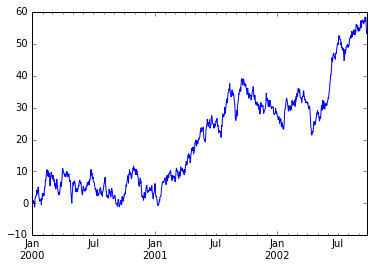

In [111]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

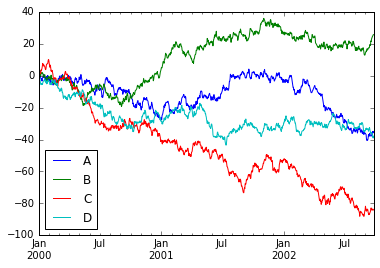

In [113]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                      columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [114]:
df.to_csv('foo.csv')

In [115]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.275665,0.890052,-0.931942,-0.479713
1,2000-01-02,1.171554,0.710785,0.744652,-2.491016
2,2000-01-03,0.127168,2.131254,-0.827462,-3.006891
3,2000-01-04,0.238904,2.629647,1.492990,-1.154141
4,2000-01-05,0.523523,3.413051,1.425929,-2.268843
5,2000-01-06,-0.197285,0.978837,2.176789,-4.475475
6,2000-01-07,-1.442144,0.039203,1.594603,-5.099605
7,2000-01-08,-1.894565,1.889878,3.618915,-5.594862
8,2000-01-09,-1.761403,1.966122,3.212910,-5.317539
9,2000-01-10,-2.448819,1.860709,3.999428,-5.479943


In [121]:
df.to_hdf('foo.h5','df')
pd.read_hdf('foo.h5','df')

ImportError: HDFStore requires PyTables, "No module named tables" problem importing

In [120]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.275665,0.890052,-0.931942,-0.479713
2000-01-02,1.171554,0.710785,0.744652,-2.491016
2000-01-03,0.127168,2.131254,-0.827462,-3.006891
2000-01-04,0.238904,2.629647,1.492990,-1.154141
2000-01-05,0.523523,3.413051,1.425929,-2.268843
2000-01-06,-0.197285,0.978837,2.176789,-4.475475
2000-01-07,-1.442144,0.039203,1.594603,-5.099605
2000-01-08,-1.894565,1.889878,3.618915,-5.594862
2000-01-09,-1.761403,1.966122,3.212910,-5.317539
2000-01-10,-2.448819,1.860709,3.999428,-5.479943


In [3]:
df = pd.read_csv('FT_ALL.csv')
df

,program_id,team_id,user_id,stat_1,stat_2,stat_3,date
0,73,381,2260,60,60,60,20/08/2015
1,73,381,2260,60,60,60,21/08/2015
2,73,381,2260,60,60,60,22/08/2015
3,73,381,2260,60,60,60,23/08/2015
4,73,381,2260,60,60,60,24/08/2015
5,73,381,2260,60,60,60,25/08/2015
6,73,381,2260,60,60,60,26/08/2015
7,73,381,2260,60,60,60,27/08/2015
8,73,381,2260,60,60,60,28/08/2015
9,73,381,2260,60,60,60,29/08/2015


In [125]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

In [126]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s

A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object

In [127]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
d

{'Austin': 450,
 'Boston': None,
 'Chicago': 1000,
 'New York': 1300,
 'Portland': 900,
 'San Francisco': 1100}

In [128]:
cities = pd.Series(d)
cities

Austin            450
Boston            NaN
Chicago          1000
New York         1300
Portland          900
San Francisco    1100
dtype: float64

In [133]:
cities / 3

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [137]:
cities['Boston'] = None
cities

Austin            450
Boston           None
Chicago          1000
New York         1300
Portland          900
San Francisco    1100
dtype: object

In [138]:
cities.notnull()

Austin            True
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool

In [139]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [140]:
data

{'losses': [5, 8, 6, 1, 5, 10, 6, 12],
 'team': ['Bears',
  'Bears',
  'Bears',
  'Packers',
  'Packers',
  'Lions',
  'Lions',
  'Lions'],
 'wins': [11, 8, 10, 15, 11, 6, 10, 4],
 'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012]}

In [141]:
df.head()

,program_id,team_id,user_id,stat_1,stat_2,stat_3,date
0,73,381,2260,60,60,60,20/08/2015
1,73,381,2260,60,60,60,21/08/2015
2,73,381,2260,60,60,60,22/08/2015
3,73,381,2260,60,60,60,23/08/2015
4,73,381,2260,60,60,60,24/08/2015


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19675 entries, 0 to 19674
Data columns (total 7 columns):
program_id    19675 non-null int64
team_id       19675 non-null int64
user_id       19675 non-null int64
stat_1        19675 non-null int64
stat_2        19675 non-null int64
stat_3        19675 non-null int64
date          19675 non-null object
dtypes: int64(6), object(1)
memory usage: 1.2+ MB


In [147]:
df.describe()

,program_id,team_id,user_id,stat_1,stat_2,stat_3
count,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000
mean,75.629987,354.005133,2229.532503,75.942058,73.513088,70.386023
std,1.486620,20.744353,140.939598,15.476183,15.853245,17.289143
min,73.000000,317.000000,1479.000000,0.000000,0.000000,0.000000
25%,74.000000,335.000000,2157.000000,60.000000,60.000000,60.000000
50%,76.000000,358.000000,2246.000000,75.000000,75.000000,70.000000
75%,77.000000,370.000000,2329.000000,90.000000,85.000000,80.000000
max,78.000000,388.000000,2385.000000,100.000000,100.000000,100.000000


In [4]:
stats = df[['stat_1', 'stat_2', 'stat_3']].copy()
stats.head()

,stat_1,stat_2,stat_3
0,60,60,60
1,60,60,60
2,60,60,60
3,60,60,60
4,60,60,60


In [6]:
df.head()

,program_id,team_id,user_id,stat_1,stat_2,stat_3,date
0,73,381,2260,60,60,60,20/08/2015
1,73,381,2260,60,60,60,21/08/2015
2,73,381,2260,60,60,60,22/08/2015
3,73,381,2260,60,60,60,23/08/2015
4,73,381,2260,60,60,60,24/08/2015


AttributeError: 'AxesSubplot' object has no attribute 'T'

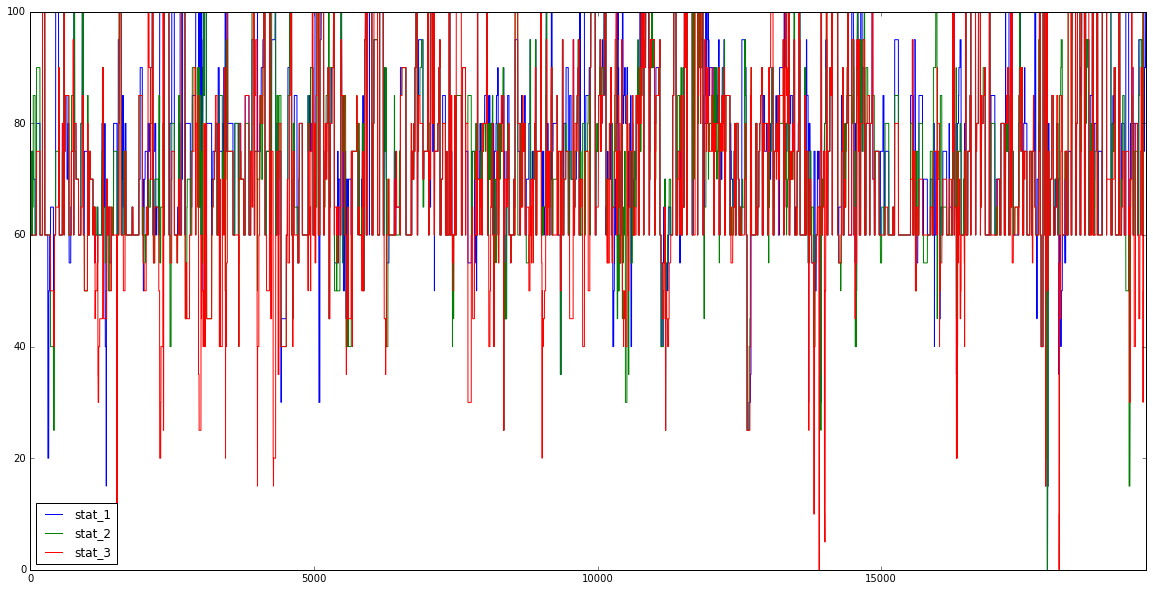

In [10]:
stats.plot(figsize=(20,10)).T

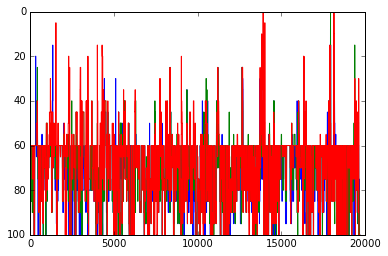

In [19]:
plt.plot(stats)
plt.gca().invert_yaxis()


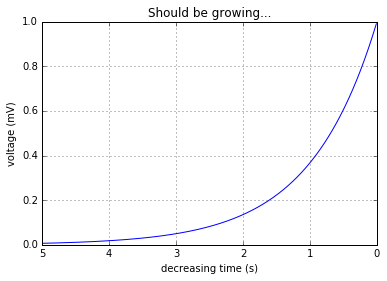

In [17]:
t = np.arange(0.01, 5.0, 0.01)
s = np.exp(-t)
plt.plot(t, s)

plt.xlim(5, 0)  # decreasing time

plt.xlabel('decreasing time (s)')
plt.ylabel('voltage (mV)')
plt.title('Should be growing...')
plt.grid(True)

plt.show()